 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [329]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [330]:
# Reading whale returns
whale_returns_csv = Path("/Users/sabrinareed/Desktop/Whale Analysis/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [331]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [332]:
# Drop nulls
whale_df = whale_df.dropna()

In [333]:
#validate nulls are dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [334]:
# Reading algorithmic returns
algo_returns_csv = Path("/Users/sabrinareed/Desktop/Whale Analysis/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [335]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [336]:
# Drop nulls
algo_df = algo_df.dropna()

In [337]:
#validate nulls are dropped
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [338]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("/Users/sabrinareed/Desktop/Whale Analysis/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [339]:
# Check Data Types
print(sp500_df.dtypes)

Close    object
dtype: object


In [340]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')

In [341]:
sp500_df['Close'] = sp500_df.astype('float')
print(sp500_df.dtypes)

Close    float64
dtype: object


In [342]:
# Calculate Daily Returns
spdaily_return = sp500_df.pct_change()
spdaily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [343]:
# Drop nulls
spdaily_return = spdaily_return.dropna()
spdaily_return.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [344]:
# Rename Column
spdaily_return = spdaily_return.rename(columns={"Close" : "S&P 500"})
spdaily_return.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [345]:
# Concatenate all DataFrames into a single DataFrame
combined_returns = pd.concat([whale_df, algo_df, spdaily_return], axis='columns', join='inner')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? - Tiger Global

<AxesSubplot:xlabel='Date'>

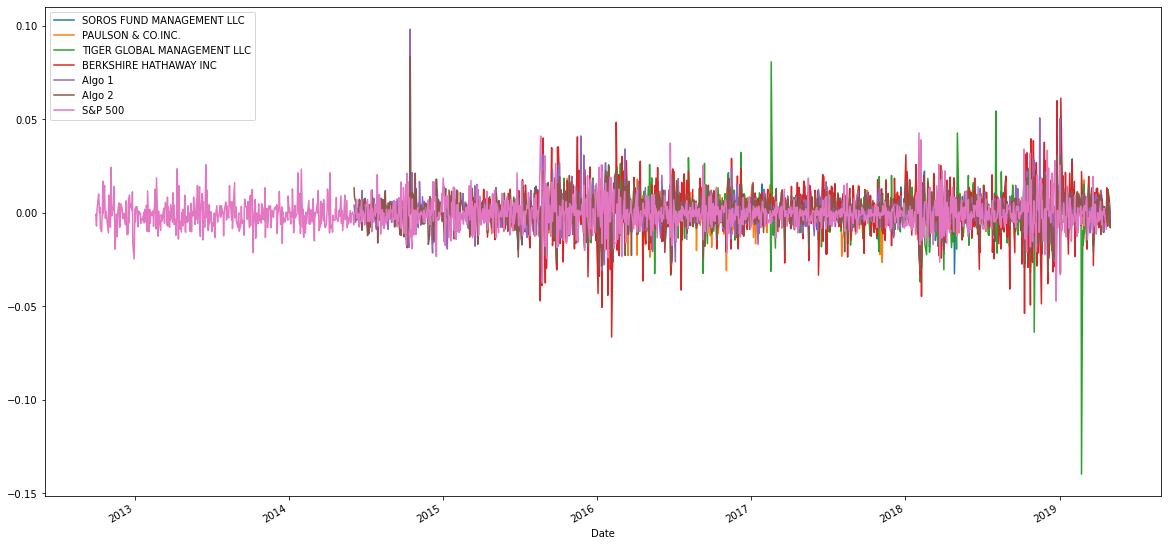

In [346]:
# Plot daily returns
ax = whale_df.plot(figsize=(20,10))
algo_df.plot(ax=ax)
spdaily_return.plot(ax=ax)


<AxesSubplot:xlabel='Date'>

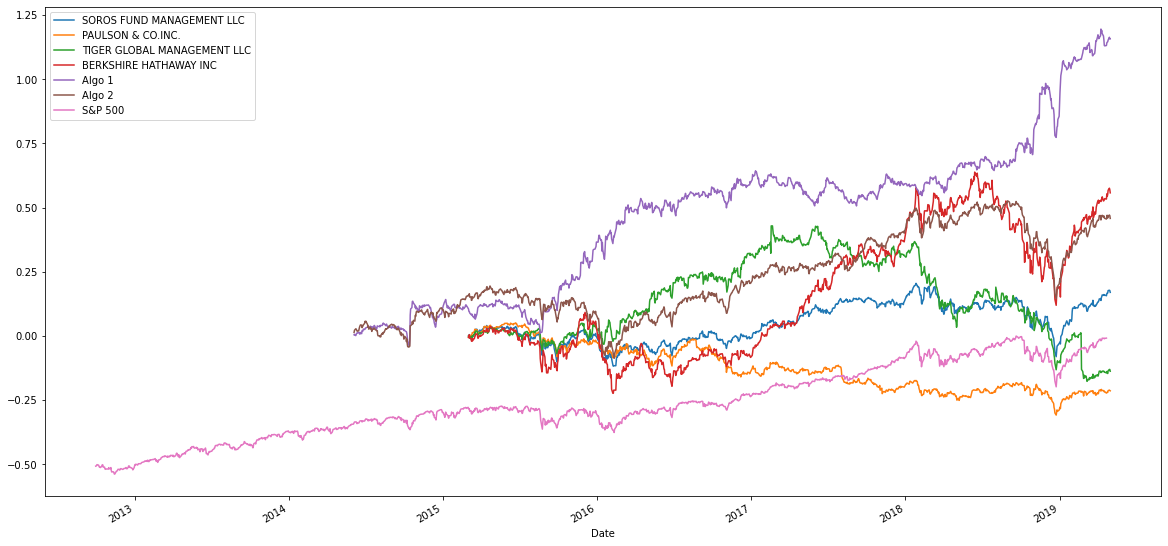

In [347]:
ax = ((whale_df + 1).cumprod() - 1).plot(figsize=(20,10))
((algo_df + 1).cumprod() - 1).plot(ax=ax)
((spdaily_return + 1).cumprod() - 1).plot(ax=ax)


## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

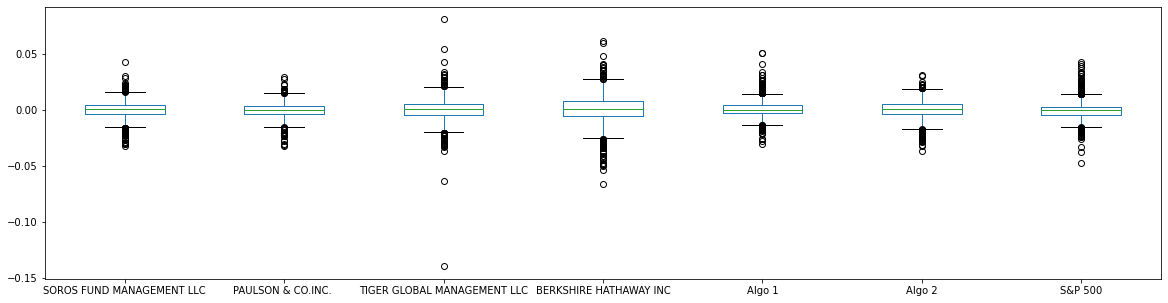

In [348]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(20,5))

In [349]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500? Soros and Paulson
combined_returns_std = combined_returns.std()
combined_returns_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [350]:
# Determine which portfolios are riskier than the S&P 500
combined_returns_std.head(7) > 0.008587

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [351]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns_std * np.sqrt(252)
annualized_std.head(7)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:xlabel='Date'>

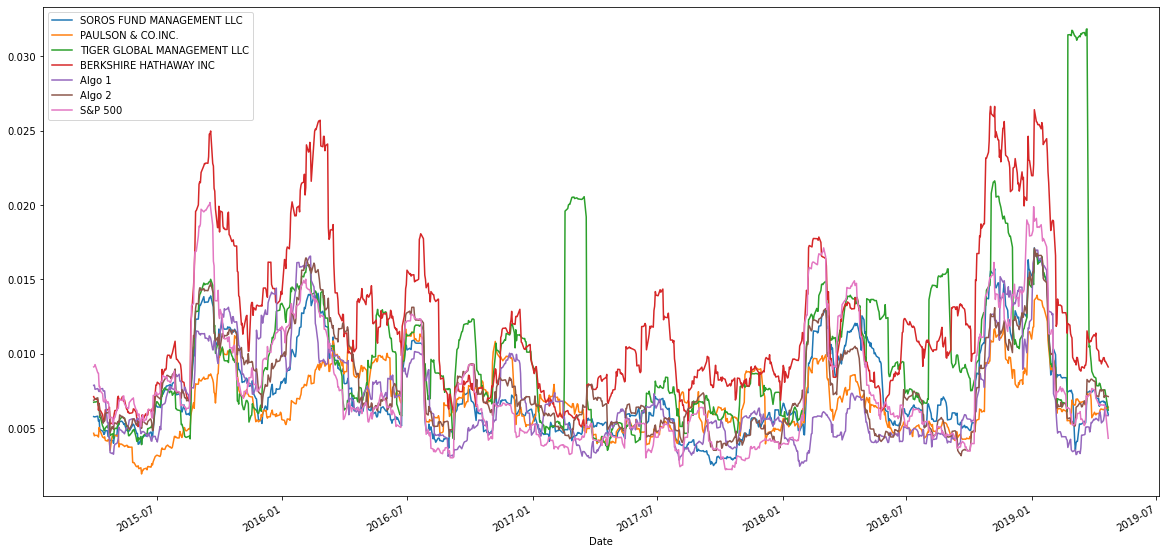

In [352]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_returns.rolling(window=21).std().plot(figsize=(20,10))

In [353]:
# Construct a correlation table
correlation = combined_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:xlabel='Date'>

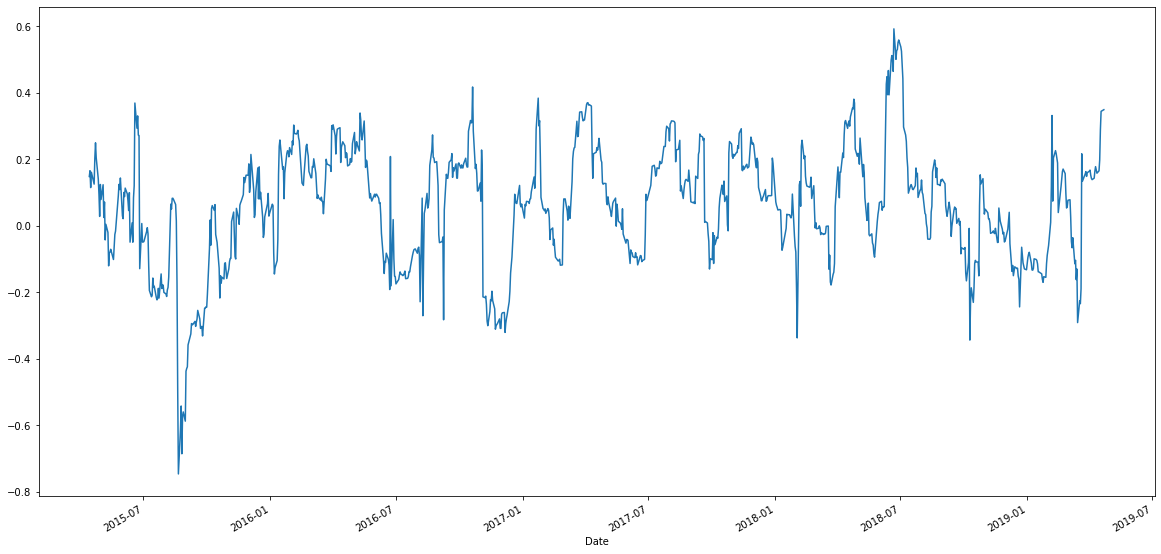

In [354]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
rolling_covariance = combined_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=30).cov(combined_returns['S&P 500'])
rolling_variance = combined_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=30).var()
soros_beta = rolling_covariance / rolling_variance
soros_beta.plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

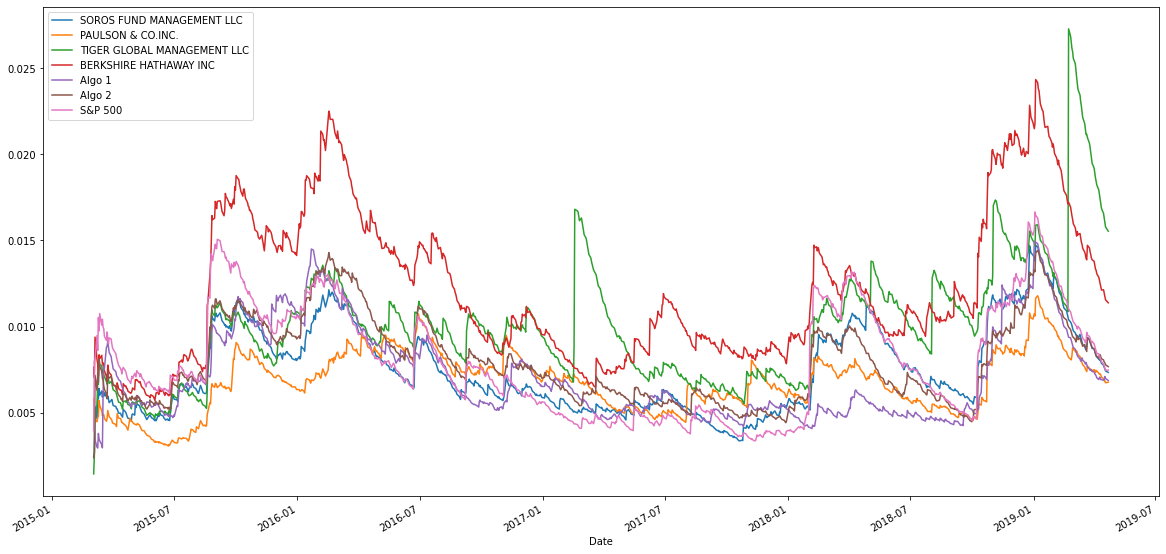

In [355]:
# Calculate a rolling window using the exponentially weighted moving average. 
combined_returns.ewm(halflife = 21).std().plot(figsize=(20, 10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [356]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

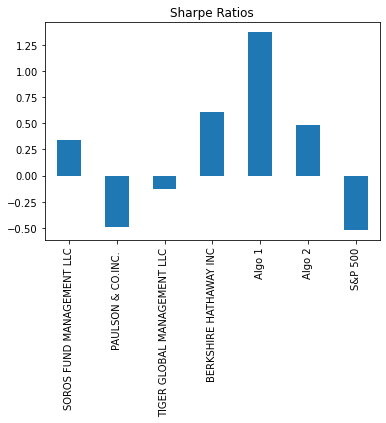

In [357]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---Algo 1 outperforms the market and whales. Algo 2 only outperforms whales.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [358]:
Path.cwd()

PosixPath('/Users/sabrinareed/Desktop/Whale Analysis')

In [359]:
# Read the first stock
csv_path1 = Path("/Users/sabrinareed/Desktop/Whale Analysis/ADP.csv")
adp_data = pd.read_csv(csv_path1, index_col="Unnamed: 0", infer_datetime_format=True, parse_dates=True)
adp_data.head()

,Unnamed: 1
Date,Close
1/2/2019 16:00:00,130.14
1/3/2019 16:00:00,126.21
1/4/2019 16:00:00,131.24
1/7/2019 16:00:00,130.53


In [360]:
#renamed column
adp_data = adp_data.rename(columns={"Unnamed: 1" : "ADP"})
adp_data.head()

,ADP
Date,Close
1/2/2019 16:00:00,130.14
1/3/2019 16:00:00,126.21
1/4/2019 16:00:00,131.24
1/7/2019 16:00:00,130.53


In [361]:
# Read the second stock
csv_path2 = Path("/Users/sabrinareed/Desktop/Whale Analysis/AAPL.csv")
aapl_data = pd.read_csv(csv_path2, index_col="Unnamed: 0", infer_datetime_format=True, parse_dates=True)
aapl_data = aapl_data.rename(columns={"Unnamed: 1" : "AAPL"})
aapl_data.head()

,AAPL
Date,Close
1/2/2019 16:00:00,39.48
1/3/2019 16:00:00,35.55
1/4/2019 16:00:00,37.07
1/7/2019 16:00:00,36.98


In [362]:
# Read the third stock
csv_path3 = Path("/Users/sabrinareed/Desktop/Whale Analysis/SYF.csv")
syf_data = pd.read_csv(csv_path3, index_col="Unnamed: 0", infer_datetime_format=True, parse_dates=True)
syf_data = syf_data.rename(columns={"Unnamed: 1" : "SYF"})
syf_data.head()

,SYF
Date,Close
1/2/2019 16:00:00,24.27
1/3/2019 16:00:00,24.09
1/4/2019 16:00:00,25.24
1/7/2019 16:00:00,25.37


In [363]:
# Concatenate all stocks into a single DataFrame
combined_data = pd.concat([adp_data, aapl_data, syf_data], axis='columns', join='inner')
combined_data.head()

,ADP,AAPL,SYF
Date,Close,Close,Close
1/2/2019 16:00:00,130.14,39.48,24.27
1/3/2019 16:00:00,126.21,35.55,24.09
1/4/2019 16:00:00,131.24,37.07,25.24
1/7/2019 16:00:00,130.53,36.98,25.37


In [364]:
# Reset the index
combined_data['ADP'] = combined_data['ADP'].str.replace('Close', '')
combined_data['AAPL'] = combined_data['AAPL'].str.replace('Close', '')
combined_data['SYF'] = combined_data['SYF'].str.replace('Close', '')
combined_data.head()

,ADP,AAPL,SYF
Date,,,
1/2/2019 16:00:00,130.14,39.48,24.27
1/3/2019 16:00:00,126.21,35.55,24.09
1/4/2019 16:00:00,131.24,37.07,25.24
1/7/2019 16:00:00,130.53,36.98,25.37


In [365]:
# Pivot so that each column of prices represents a unique symbol

In [366]:
# Drop Nulls
combined_data = combined_data.dropna()
combined_data.head()

,ADP,AAPL,SYF
Date,,,
1/2/2019 16:00:00,130.14,39.48,24.27
1/3/2019 16:00:00,126.21,35.55,24.09
1/4/2019 16:00:00,131.24,37.07,25.24
1/7/2019 16:00:00,130.53,36.98,25.37


In [367]:
print(combined_data.dtypes)

ADP     object
AAPL    object
SYF     object
dtype: object


In [368]:
combined_data['ADP'] = pd.to_numeric(combined_data['ADP'], errors='coerce')
combined_data['AAPL'] = pd.to_numeric(combined_data['AAPL'], errors='coerce')
combined_data['SYF'] = pd.to_numeric(combined_data['SYF'], errors='coerce')

print(combined_data.dtypes)

ADP     float64
AAPL    float64
SYF     float64
dtype: object


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [369]:
combined_data = combined_data.pct_change()
combined_data.head(7)

,ADP,AAPL,SYF
Date,NaN,NaN,NaN
1/2/2019 16:00:00,NaN,NaN,NaN
1/3/2019 16:00:00,-0.030198,-0.099544,-0.007417
1/4/2019 16:00:00,0.039854,0.042757,0.047738
1/7/2019 16:00:00,-0.005410,-0.002428,0.005151
1/8/2019 16:00:00,0.005899,0.019200,0.001971
1/9/2019 16:00:00,0.000914,0.016981,0.022423


In [370]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns = combined_data.dot(weights)
portfolio_returns.head()

Date                      NaN
1/2/2019 16:00:00         NaN
1/3/2019 16:00:00   -0.045720
1/4/2019 16:00:00    0.043450
1/7/2019 16:00:00   -0.000896
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [371]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
all_the_returns = pd.concat([combined_returns, portfolio_returns], axis='columns', join='inner')
all_the_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0


In [372]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_the_returns = all_the_returns.dropna()
all_the_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [373]:
# Risk
all_the_returns_std = all_the_returns.std()
all_the_returns_std.head(8)

SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
S&P 500                       NaN
0                             NaN
dtype: float64

<AxesSubplot:>

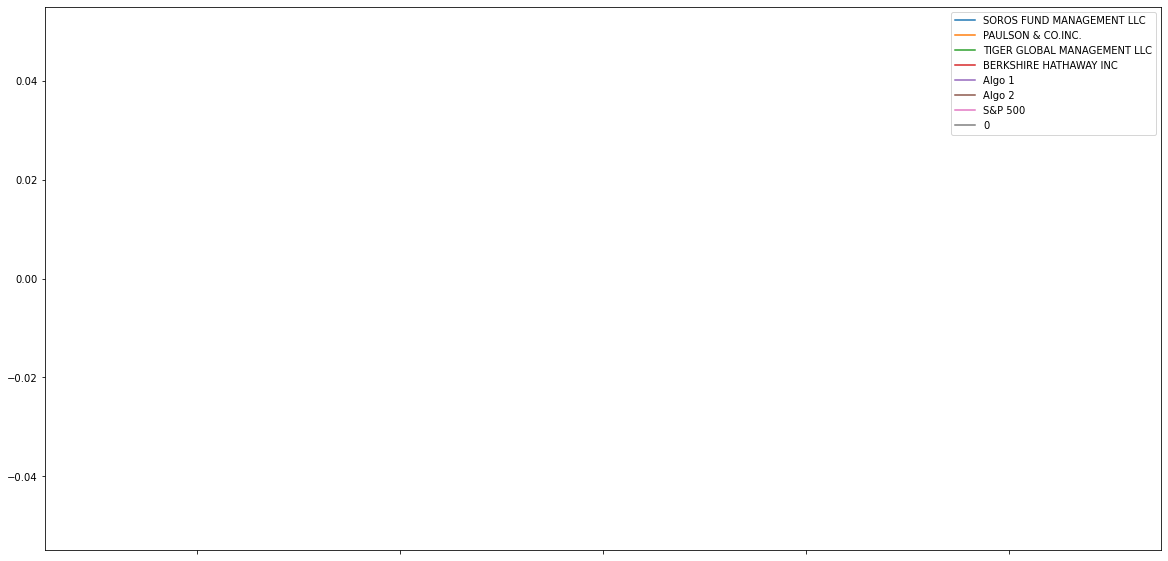

In [374]:
# Rolling
all_the_returns.rolling(window=21).std().plot(figsize=(20,10))

In [375]:
# Annualized Sharpe Ratios
sharpe_ratios2 = (all_the_returns.mean() * 252) / (all_the_returns.std() * np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
S&P 500                       NaN
0                             NaN
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

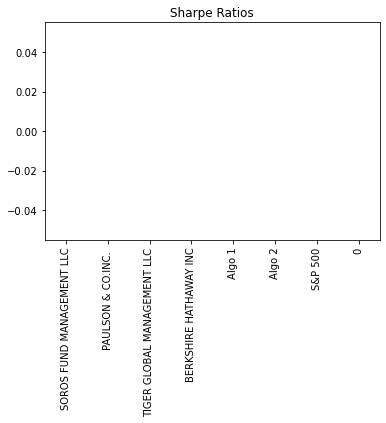

In [376]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot.bar(title='Sharpe Ratios')

In [377]:
# Create a correlation analysis
correlation2 = all_the_returns.corr()
correlation2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
SOROS FUND MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAULSON & CO.INC.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIGER GLOBAL MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S&P 500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [378]:
# Beta
rolling_covariance2 = all_the_returns['ADP'].rolling(window=30).cov(all_the_returns['S&P 500'])
rolling_variance2 = all_the_returns['ADP'].rolling(window=30).var()
adp_beta = rolling_covariance2 / rolling_variance2
adp_beta.plot(figsize=(20, 10))

KeyError: 'ADP'